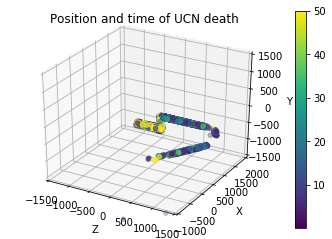

In [3]:
# with copper block
# aliveOutputFile = "../models/sun2/filling/data/alive.out"

# with no copper block
aliveOutputFile = "../models/sun2/filling_noBlock/data/alive.out"


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def file_length(file_name):
    with open(file_name) as f:
        i = -1
        for i, l in enumerate(f):
            pass
        return i+1

# Read in alive time output file
n_lines = file_length(aliveOutputFile)
data = np.zeros((n_lines, 7))
with open(aliveOutputFile, 'r') as f:
    for i, line in enumerate(f):
        line_list = line.split(" ")
        alive_time   = float(line_list[0][:-1])
        position_vector_1 = (line_list[1][1:-2]).split(",")
        position_vector_2 = (line_list[2][1:-2]).split(",")
        x1, y1, z1  = np.array(position_vector_1).astype("float")  
        x2, y2, z2  = np.array(position_vector_2).astype("float")  
        data[i,0] = alive_time
        data[i,1] = x1
        data[i,2] = y1
        data[i,3] = z1
        data[i,4] = x2
        data[i,5] = y2
        data[i,6] = z2

alive_times = data[:,0]
death_position = data[:,4:]

from mpl_toolkits.mplot3d import Axes3D

view_range = 3000   # mm
x_view_center = 500 # mm
y_view_center = 0   # mm
z_view_center = 0   # mm

# plt.rcParams["figure.figsize"] = 10, 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = death_position[:,0]
ys = death_position[:,1]
zs = death_position[:,2]

sc = ax.scatter(zs, xs, ys, c=alive_times)
    
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

ax.set_xlim((-view_range/2+z_view_center,+view_range/2+z_view_center)) # z
ax.set_ylim((-view_range/2+x_view_center,+view_range/2+x_view_center)) # x
ax.set_zlim((-view_range/2+y_view_center,+view_range/2+y_view_center)) # y

ax.set_title("Position and time of UCN death")

fig.colorbar(sc)

plt.show()

In [4]:
cloud = death_position
np.save("cloud", cloud)